<a href="https://colab.research.google.com/github/19PA1A0563/python-basics/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# call the heavenly Gods!
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Sample data
data0 = [(1, 1), (2, 2), (3, 4), (4, 3), (5, 5.5), (6, 8), (7, 6), (8, 8.4), (9, 10), (5, 4)]
data1=[(12.39999962,11.19999981),(14.30000019,12.5),(14.5,12.69999981),(14.89999962,13.10000038),(16.10000038,14.10000038),(16.89999962,14.80000019),(16.5,14.39999962),(15.39999962,13.39999962),(17,14.89999962),(17.89999962,15.60000038),(18.79999924,16.39999962),(20.29999924,17.70000076),(22.39999962,19.60000038),(19.39999962,16.89999962),(15.5,14),(16.70000076,14.60000038),(17.29999924,15.10000038),(18.39999962,16.10000038),(19.20000076,16.79999924),(17.39999962,15.19999981),(19.5,17),(19.70000076,17.20000076),(21.20000076,18.60000038)]
data2=[(20,88.59999847),(16,71.59999847),(19.79999924,93.30000305),(18.39999962,84.30000305),(17.10000038,80.59999847),(15.5,75.19999695),(14.69999981,69.69999695),(17.10000038,82),(15.39999962,69.40000153),(16.20000076,83.30000305),(15,79.59999847),(17.20000076,82.59999847),(16,80.59999847),(17,83.5),(14.39999962,76.30000305)]
data3=[(0.170000002,0.629999995),(0.189999998,0.699999988),(0.219999999,0.819999993),(0.234999999,0.879999995),(0.234999999,1.149999976),(0.300000012,1.5),(0.349999994,4.400000095),(0.419999987,7.300000191),(0.850000024,11.30000019)]
data4=[(2.900000095,4),(6.699999809,7.400000095),(4.900000095,5),(7.900000095,7.199999809),(9.800000191,7.900000095),(6.900000095,6.099999905),(6.099999905,6),(6.199999809,5.800000191),(6,5.199999809),(5.099999905,4.199999809),(4.699999809,4),(4.400000095,4.400000095),(5.800000191,5.199999809)]
data5=[(6.2,29),(9.5,44),(10.5,36),(7.7,37),(8.6,53),(34.1,68),(11,75),(6.9,18),(7.3,31),(15.1,25),(29.1,34),(2.2,14),(5.7,11),(2,11),(2.5,22),(4,16),(5.4,27),(2.2,9),(7.2,29),(15.1,30),(16.5,40),(18.4,32),(36.2,41),(39.7,147),(18.5,22),(23.3,29),(12.2,46),(5.6,23),(21.8,4),(21.6,31),(9,39),(3.6,15),(5,32),(28.6,27),(17.4,32),(11.3,34),(3.4,17),(11.9,46),(10.5,42),(10.7,43),(10.8,34),(4.8,19)]

In [0]:
# helper function to ass X0 = 1 for all X values in training data
# see how I have done it. You may or may not use it.
def add_bias(X):
  return np.insert(X, 0, 1,  axis=1)

In [0]:
data = data0
# prepare training data. X is a feature vector [X0,X1].
# Here X1 is our actual value and X0 is the bias term which is always 1. 
# This is used so that our vector multiplication logic works with Theta0
X = np.array(list(map(lambda x: [1, x[0]], data)))
y = np.array(list(map(lambda x: x[1], data)))

In [0]:
def plot_line(Theta, X, y):
  x = np.arange(np.min(X), np.max(X)) # some sample x values to predict
  y_pred = Theta[0] + Theta[1]*x # get predicted values
  # y_pred = add_bias(x.reshape(x.shape[0], 1)).dot(Theta.T) # try to understand this
  plt.scatter(X[:,1], y) # plot the points, we dont want bias here
  plt.plot(x, y_pred) # plot the predicted line

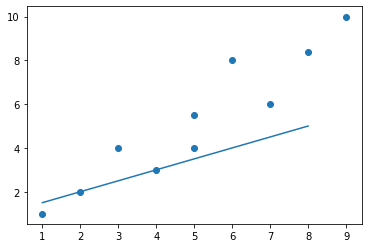

In [0]:
plot_line(np.array([1,0.5]), X, y) # let us plot with a sample 45 degree line

In [0]:
# function to calculate J(Theta) or cost
def cost(X, y, Theta):
  m = X.shape[0] # number of training examples
  return np.sum(np.square(X.dot(Theta.T)-y)/m)/2

In [0]:
# let us do some tests
Theta = np.array([0, 1])
cost(X, y, Theta)

0.47050000000000003

In [0]:
# function to calculate the gradient.
# The magic here is that we are using numpy vector processors to do it really fast
# rather than calculating Theta0 and Theta1 separately we are doing it in one shot.
def gradient(X, y, Theta, j):
  m = X.shape[0] # number of training examples
  # try to carefully understand the below line
  # (X.dot(Theta.T)-y) = predicted - actual
  # *X[:,j] is the derivative part for Theta_j. Remember we added X0 = 1.
  # This helps for Theta_0 without considering it as special case
  a = (X.dot(Theta.T)-y)*X[:,j]
  return np.sum(a)/m

In [0]:
gradient(X, y, Theta, 0)

-0.19000000000000003

In [0]:
gradient(X, y, Theta, 1)

-1.3700000000000003

In [0]:
def gradient_descent(X, y, alpha=0.01, tolerance=0.00001, max_iters=100, verbose=False):
  Theta = np.random.random(X.shape[1])
  theta_history = []
  cost_history = []
  j = cost(X, y, Theta)
  n = 0
  while n<max_iters:
    # store history
    cost_history.append(j)
    theta_history.append(Theta.tolist())

    # caluclate gradients. Try to understand below code carefully!
    gradients = np.array([gradient(X, y, Theta, d) for d in range(Theta.shape[0])])

    # apply gradients to calculate new values of theta using numpy
    Theta -= alpha*gradients

    # find the new cost base don the new thetas
    j = cost(X, y, Theta)

    # see if the difference between new and old cost is negligible
    # if yes break
    if abs(j-cost_history[-1])<tolerance:
      break
    
    #increment interation count
    n+=1

    # print stats till now
    if verbose:
      print(f"iteration {n}, cost = {j}, Theta = {Theta}, Gradients = {gradients}")
  else:
    # if we did not reach tolerance and we are ending let us know.
    print(f"stopped after {n} iterations")

  return Theta, np.array(theta_history), np.array(cost_history)

In [0]:
Theta, theta_history, cost_history = gradient_descent(X, y, alpha=0.05, max_iters=10000)

0.4382642902981311


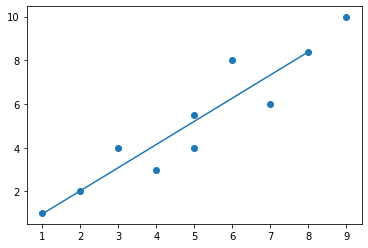

In [0]:
plot_line(Theta, X, y)
print(cost(X, y, Theta))

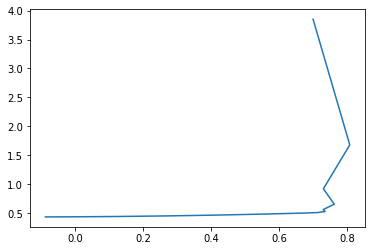

In [0]:
plt.plot(theta_history[:,0], cost_history)

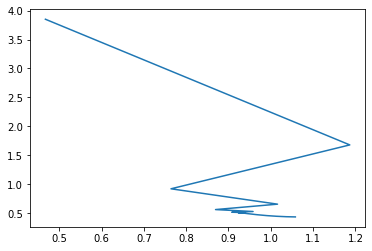

In [0]:
plt.plot(theta_history[:,1], cost_history)

## Exercise 1
Can you divide the data into two parts. Pick 80% randomly as train and 20% remaining as test. Then fit the model only using train data and do predictions based on test data. Report your cost or average error in your test and note your observations clearly.

**HINT**: Python random package has random.shuffle that takes an array and shuffles it. Suppose you have n observations from 0 to n-1
1. create an array of 0 to n-1 : a = list(range(n))
2. shuffle it using random.shuffle(a)
3. let k = int(.8*n)
4. train = a[:k]
5. test = a[k:]


## Exercise 2

Check out the [datasets here](https://drive.google.com/drive/folders/1yqfrpSZzyOgNj2Igp3Q22tYcI3KHglmV).

Some are univariate i.e. single feature and single label and others are multivariate (multiple observations are made). Some of the datsets from univariate are already imported as data1 to data 5 for you at the top of this colab notebook. Please experiment with them and see if you can make a line fit for each. Please record your observations.



## Exercise 3
In the mutivariate data sets, pick any **two datasets** of your choice and formulate a ML problem. Particularly identify what you plan to be your features and wht you plan to be your labels. For now assume only a linear hypothesis and based on your work in Exercise 1, train your model and report your observations and test error.

**NOTE:** It will be not possible to plot a line here because you will have multiple dimensions. In 3D you fit a plane and not a line. See if some of you can come up with a 3D plot if you have 2 features and one label. Beyond that you cant visualize.

**HINT** use pandas to import the csv files and extract the series and make your numpy vectors.
























































# Example multivariate analysis

To help you out I am giving an example for exercise 3.

In [0]:
import pandas as pd

df = pd.read_csv("Crime.csv")


In [0]:
df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


The description of data says:
* The data (X1, X2, X3, X4, X5, X6, X7) are for each city.
* X1 = total overall reported crime rate per 1 million residents
* X2 = reported violent crime rate per 100,000 residents
* X3 = annual police funding in $/resident
* X4 = % of people 25 years+ with 4 yrs. of high school
* X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.
* X6 = % of 18 to 24 year-olds in college
* X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

Let us make the columns meaningful.





















































































In [0]:
df.columns = ['total_crime', 'violent_crime', 'police_funding', '25plus_highschool', '16to19_nonhighschool', '18to24_college', '25plus_college']

In [0]:
df.describe()

,total_crime,violent_crime,police_funding,25plus_highschool,16to19_nonhighschool,18to24_college,25plus_college
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,717.960000,616.180000,37.760000,58.800000,15.400000,29.900000,13.820000
std,293.938766,573.739175,13.820364,9.965246,6.023762,14.801062,5.157479
min,341.000000,29.000000,16.000000,42.000000,4.000000,7.000000,8.000000
25%,497.000000,230.750000,30.000000,49.000000,11.000000,21.250000,11.000000
50%,654.500000,454.000000,34.500000,59.000000,14.000000,25.000000,12.000000
75%,820.500000,822.500000,42.250000,67.000000,19.000000,34.250000,15.750000
max,1740.000000,3545.000000,86.000000,81.000000,34.000000,81.000000,36.000000


## Setting Targets (defining your problem)

A hypohesis can be that if people are well educated the crime should reduce. If through ML we can predict the crime and especially violent crime in city, we can help combat by allocating appropriate police funds and even promore better education.

In [0]:
import seaborn as sns

## Observations
There are no missing or NAN values. The ranges suggest no outliers either so there is not much to clean here.

Let us see the correlations.

[see here](https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f) for learning more about formatting heatmaps with seaborn.

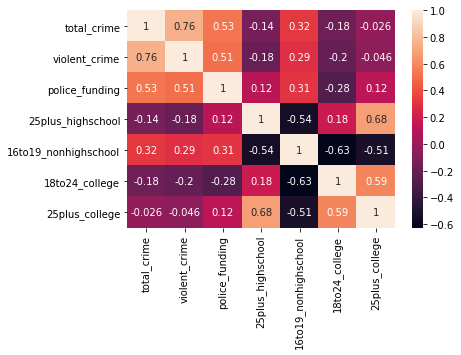

In [0]:
sns.heatmap(df.corr(), annot=True)

## Analysis

The above correlations suggest that there is positive correlation between: 
1. **crime and police funding**: We can see it in two ways. Certainly more police means more crime is counter intruitive which the positive correlation is suggesting. So other way round is betetr, i.e. police funding is an outcome of crime obervation, i.e. more crime means more police funding.

2. **crime vs 16to19_nonhighschool** shows some weak positive correlation and **crime vs 18to24_college** shows some weak negative correlation. This affirms our hypothesis to some degree. There is also a strong negative correlation between **16to19_nonhighschool and 18to24_college** so probably we can pick one of them as an indicator initially. Let us pick 16to19_highschool.

3. **crime vs 25plus_highschool** also has negative correlation, but again **25plus_highschool and 16to19_nonhighschool** have moderate negative correlation.

## Strategy

* Let us first begin with single feature and label. X being 16to19_nonhighschool and Y beinf violent_crime

147634.85927131385


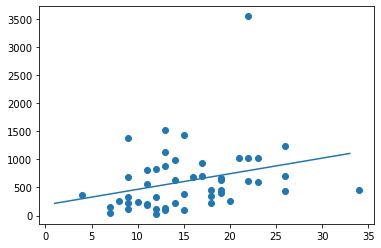

In [0]:
X = np.array(list(map(lambda x: [1, x], df['16to19_nonhighschool'].to_numpy())))
y = df['violent_crime'].to_numpy()
Theta, theta_history, cost_history = gradient_descent(X, y, alpha=0.005, max_iters=10000)
plot_line(Theta, X, y)
print("cost: ", cost(X, y, Theta))
#plt.plot(theta_history[:,0], cost_history)
#plt.plot(theta_history[:,1], cost_history)

### Adding more features

Let us add one more feature say 18to24_college

In [0]:
X = add_bias(df[['16to19_nonhighschool', '18to24_college']].to_numpy())
y = df['violent_crime'].to_numpy()
Theta, theta_history, cost_history = gradient_descent(X, y, alpha=0.001, max_iters=20000)
print("cost: ", cost(X, y, Theta))

stopped after 20000 iterations
cost:  147823.10062763124


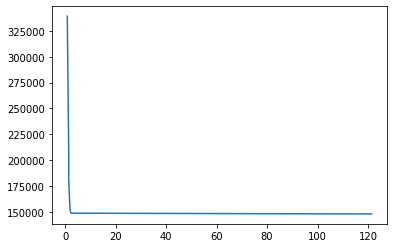

In [0]:
plt.plot(theta_history[:,0], cost_history)

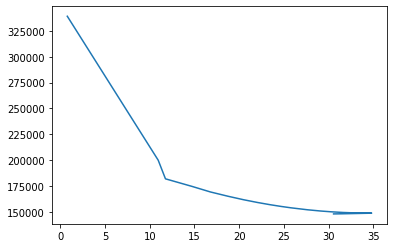

In [0]:
plt.plot(theta_history[:,1], cost_history)

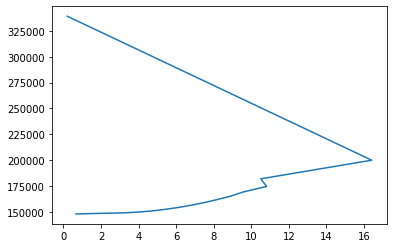

In [0]:
plt.plot(theta_history[:,2], cost_history)

In [0]:
Theta

array([121.45429373,  30.56191531,   0.6650282 ])

## Try some more?
This probably did not help. Can we think of more? What is your observation above. Do the theta values make sense? It seems the contribution of new feature we added is not so useful. And we guess that because the two features have a good ampunt of correlation.

Also look at Theta_0. That is by far having a big contribution given that range of values we have for 16to19_nonhighschool as 4 to 34.